## Financial Risk Analysis with Python- Barclays

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Task 1: Data Cleaning and Formatting

In [61]:
barclays=pd.read_excel("Barclays Financial Transactional Data.xlsx")
barclays

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths
0,118,CUST3810,ACC49774,Savings,Deposit,Credit Card,Firm D,West,Manager 4,2024-08-01 00:00:00,"20,664.41","88,483.42",0.48,522,29
1,102,CUST3109,ACC96277,Savings,Deposit,Mutual Fund,Firm B,North,Manager 4,17-12-2023,"94,924.36","56,670.16",0.79,686,130
2,151,CUST2626,ACC21429,Credit,Payment,Personal Loan,Firm C,West,Manager 1,22-05-2024,"-7,871.16","84,968.06",0.55,618,157
3,57,CUST3725,ACC48501,Loan,Withdrawal,Credit Card,Firm A,East,Manager 4,24-12-2023,"24,979.81","115,196.96",0.13,803,155
4,113,CUST4258,ACC11285,Loan,Transfer,Home Loan,Firm A,West,Manager 4,15-01-2023,"72,890.75","111,602.77",1.05,657,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,102,CUST9535,ACC88516,Current,Deposit,Mutual Fund,Firm E,North,Manager 3,26-09-2023,"56,158.33","49,260.12",0.97,371,206
796,106,CUST6937,ACC65144,Savings,Transfer,Mutual Fund,Firm D,East,Manager 3,2023-06-07 00:00:00,"57,508.00","19,847.82",0.91,748,72
797,61,CUST3725,ACC70741,Loan,Deposit,Mutual Fund,Firm E,North,Manager 4,2023-02-01 00:00:00,"77,193.68","30,102.95",0.66,438,142
798,110,CUST6350,ACC12182,Credit,Payment,Personal Loan,Firm A,East,Manager 1,28-09-2023,"44,400.43","87,156.83",0.34,333,144


In [62]:
## Remove/treat any special characters or non-numeric entries from financial fields.

financial_columns=['TransactionAmount','AccountBalance']
for f in financial_columns:
    barclays[f]=barclays[f].astype(str).str.replace('[^\d.-]','',regex=True)
    barclays[f]=pd.to_numeric(barclays[f],errors='coerce')

## Removes missing values 
barclays.dropna(subset=['TransactionDate','TransactionAmount','AccountBalance'],inplace=True)
barclays

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths
0,118,CUST3810,ACC49774,Savings,Deposit,Credit Card,Firm D,West,Manager 4,2024-08-01 00:00:00,"20,664.41","88,483.42",0.48,522,29
1,102,CUST3109,ACC96277,Savings,Deposit,Mutual Fund,Firm B,North,Manager 4,17-12-2023,"94,924.36","56,670.16",0.79,686,130
2,151,CUST2626,ACC21429,Credit,Payment,Personal Loan,Firm C,West,Manager 1,22-05-2024,"-7,871.16","84,968.06",0.55,618,157
3,57,CUST3725,ACC48501,Loan,Withdrawal,Credit Card,Firm A,East,Manager 4,24-12-2023,"24,979.81","115,196.96",0.13,803,155
4,113,CUST4258,ACC11285,Loan,Transfer,Home Loan,Firm A,West,Manager 4,15-01-2023,"72,890.75","111,602.77",1.05,657,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,102,CUST9535,ACC88516,Current,Deposit,Mutual Fund,Firm E,North,Manager 3,26-09-2023,"56,158.33","49,260.12",0.97,371,206
796,106,CUST6937,ACC65144,Savings,Transfer,Mutual Fund,Firm D,East,Manager 3,2023-06-07 00:00:00,"57,508.00","19,847.82",0.91,748,72
797,61,CUST3725,ACC70741,Loan,Deposit,Mutual Fund,Firm E,North,Manager 4,2023-02-01 00:00:00,"77,193.68","30,102.95",0.66,438,142
798,110,CUST6350,ACC12182,Credit,Payment,Personal Loan,Firm A,East,Manager 1,28-09-2023,"44,400.43","87,156.83",0.34,333,144


In [63]:
## Validate and format date columns.
barclays['TransactionDate']=pd.to_datetime(barclays['TransactionDate'],errors='coerce')

In [64]:
## Ensure account types and transaction categories are standardized.

barclays['AccountType']=barclays['AccountType'].str.strip().str.title()  ##Removes leading & trailing spaces
barclays['TransactionType']=barclays['TransactionType'].str.strip().str.title()  ## Converts to Title Case

In [65]:
barclays

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths
0,118,CUST3810,ACC49774,Savings,Deposit,Credit Card,Firm D,West,Manager 4,2024-08-01,"20,664.41","88,483.42",0.48,522,29
1,102,CUST3109,ACC96277,Savings,Deposit,Mutual Fund,Firm B,North,Manager 4,2023-12-17,"94,924.36","56,670.16",0.79,686,130
2,151,CUST2626,ACC21429,Credit,Payment,Personal Loan,Firm C,West,Manager 1,2024-05-22,"-7,871.16","84,968.06",0.55,618,157
3,57,CUST3725,ACC48501,Loan,Withdrawal,Credit Card,Firm A,East,Manager 4,2023-12-24,"24,979.81","115,196.96",0.13,803,155
4,113,CUST4258,ACC11285,Loan,Transfer,Home Loan,Firm A,West,Manager 4,2023-01-15,"72,890.75","111,602.77",1.05,657,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,102,CUST9535,ACC88516,Current,Deposit,Mutual Fund,Firm E,North,Manager 3,2023-09-26,"56,158.33","49,260.12",0.97,371,206
796,106,CUST6937,ACC65144,Savings,Transfer,Mutual Fund,Firm D,East,Manager 3,2023-06-07,"57,508.00","19,847.82",0.91,748,72
797,61,CUST3725,ACC70741,Loan,Deposit,Mutual Fund,Firm E,North,Manager 4,2023-02-01,"77,193.68","30,102.95",0.66,438,142
798,110,CUST6350,ACC12182,Credit,Payment,Personal Loan,Firm A,East,Manager 1,2023-09-28,"44,400.43","87,156.83",0.34,333,144


In [66]:
## remove the rows with null NaN vlaues

barclays.dropna(subset=['TransactionID','TransactionDate','TransactionAmount'],inplace=True)
barclays

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths
0,118,CUST3810,ACC49774,Savings,Deposit,Credit Card,Firm D,West,Manager 4,2024-08-01,"20,664.41","88,483.42",0.48,522,29
1,102,CUST3109,ACC96277,Savings,Deposit,Mutual Fund,Firm B,North,Manager 4,2023-12-17,"94,924.36","56,670.16",0.79,686,130
2,151,CUST2626,ACC21429,Credit,Payment,Personal Loan,Firm C,West,Manager 1,2024-05-22,"-7,871.16","84,968.06",0.55,618,157
3,57,CUST3725,ACC48501,Loan,Withdrawal,Credit Card,Firm A,East,Manager 4,2023-12-24,"24,979.81","115,196.96",0.13,803,155
4,113,CUST4258,ACC11285,Loan,Transfer,Home Loan,Firm A,West,Manager 4,2023-01-15,"72,890.75","111,602.77",1.05,657,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,102,CUST9535,ACC88516,Current,Deposit,Mutual Fund,Firm E,North,Manager 3,2023-09-26,"56,158.33","49,260.12",0.97,371,206
796,106,CUST6937,ACC65144,Savings,Transfer,Mutual Fund,Firm D,East,Manager 3,2023-06-07,"57,508.00","19,847.82",0.91,748,72
797,61,CUST3725,ACC70741,Loan,Deposit,Mutual Fund,Firm E,North,Manager 4,2023-02-01,"77,193.68","30,102.95",0.66,438,142
798,110,CUST6350,ACC12182,Credit,Payment,Personal Loan,Firm A,East,Manager 1,2023-09-28,"44,400.43","87,156.83",0.34,333,144


### Task 2: Descriptive Transactional Analysis

In [67]:
## Calculate monthly and yearly summaries of total credits, debits, and net transaction volume.

## create month and year columns 
barclays['Year']=barclays['TransactionDate'].dt.year
barclays['Month']=barclays['TransactionDate'].dt.to_period('M')

barclays

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths,Year,Month
0,118,CUST3810,ACC49774,Savings,Deposit,Credit Card,Firm D,West,Manager 4,2024-08-01,"20,664.41","88,483.42",0.48,522,29,2024,2024-08
1,102,CUST3109,ACC96277,Savings,Deposit,Mutual Fund,Firm B,North,Manager 4,2023-12-17,"94,924.36","56,670.16",0.79,686,130,2023,2023-12
2,151,CUST2626,ACC21429,Credit,Payment,Personal Loan,Firm C,West,Manager 1,2024-05-22,"-7,871.16","84,968.06",0.55,618,157,2024,2024-05
3,57,CUST3725,ACC48501,Loan,Withdrawal,Credit Card,Firm A,East,Manager 4,2023-12-24,"24,979.81","115,196.96",0.13,803,155,2023,2023-12
4,113,CUST4258,ACC11285,Loan,Transfer,Home Loan,Firm A,West,Manager 4,2023-01-15,"72,890.75","111,602.77",1.05,657,68,2023,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,102,CUST9535,ACC88516,Current,Deposit,Mutual Fund,Firm E,North,Manager 3,2023-09-26,"56,158.33","49,260.12",0.97,371,206,2023,2023-09
796,106,CUST6937,ACC65144,Savings,Transfer,Mutual Fund,Firm D,East,Manager 3,2023-06-07,"57,508.00","19,847.82",0.91,748,72,2023,2023-06
797,61,CUST3725,ACC70741,Loan,Deposit,Mutual Fund,Firm E,North,Manager 4,2023-02-01,"77,193.68","30,102.95",0.66,438,142,2023,2023-02
798,110,CUST6350,ACC12182,Credit,Payment,Personal Loan,Firm A,East,Manager 1,2023-09-28,"44,400.43","87,156.83",0.34,333,144,2023,2023-09


In [68]:
## create  debit and credit column
barclays['CreditAmount']=barclays['TransactionAmount'].where(barclays['TransactionType'].isin(['Deposit','Transfer']),0)
barclays['DebitAmount']=barclays['TransactionAmount'].where(barclays['TransactionType'].isin(['Payment','Withdrawal']),0)
barclays

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths,Year,Month,CreditAmount,DebitAmount
0,118,CUST3810,ACC49774,Savings,Deposit,Credit Card,Firm D,West,Manager 4,2024-08-01,"20,664.41","88,483.42",0.48,522,29,2024,2024-08,"20,664.41",0.00
1,102,CUST3109,ACC96277,Savings,Deposit,Mutual Fund,Firm B,North,Manager 4,2023-12-17,"94,924.36","56,670.16",0.79,686,130,2023,2023-12,"94,924.36",0.00
2,151,CUST2626,ACC21429,Credit,Payment,Personal Loan,Firm C,West,Manager 1,2024-05-22,"-7,871.16","84,968.06",0.55,618,157,2024,2024-05,0.00,"-7,871.16"
3,57,CUST3725,ACC48501,Loan,Withdrawal,Credit Card,Firm A,East,Manager 4,2023-12-24,"24,979.81","115,196.96",0.13,803,155,2023,2023-12,0.00,"24,979.81"
4,113,CUST4258,ACC11285,Loan,Transfer,Home Loan,Firm A,West,Manager 4,2023-01-15,"72,890.75","111,602.77",1.05,657,68,2023,2023-01,"72,890.75",0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,102,CUST9535,ACC88516,Current,Deposit,Mutual Fund,Firm E,North,Manager 3,2023-09-26,"56,158.33","49,260.12",0.97,371,206,2023,2023-09,"56,158.33",0.00
796,106,CUST6937,ACC65144,Savings,Transfer,Mutual Fund,Firm D,East,Manager 3,2023-06-07,"57,508.00","19,847.82",0.91,748,72,2023,2023-06,"57,508.00",0.00
797,61,CUST3725,ACC70741,Loan,Deposit,Mutual Fund,Firm E,North,Manager 4,2023-02-01,"77,193.68","30,102.95",0.66,438,142,2023,2023-02,"77,193.68",0.00
798,110,CUST6350,ACC12182,Credit,Payment,Personal Loan,Firm A,East,Manager 1,2023-09-28,"44,400.43","87,156.83",0.34,333,144,2023,2023-09,0.00,"44,400.43"


In [69]:
Monthly_summary=barclays.groupby('Month').agg(TotalCredits=('CreditAmount','sum'),
                                              TotalDebits=('DebitAmount','sum'),
                                              NetTransactionVolume=('TransactionAmount','sum'))
pd.set_option('display.float_format', '{:,.2f}'.format)
Monthly_summary

,TotalCredits,TotalDebits,NetTransactionVolume
Month,,,
2023-01,"1,480,230.78","1,627,909.60","3,108,140.38"
2023-02,"887,212.77","904,342.58","1,791,555.35"
2023-03,"675,150.64","221,570.90","896,721.54"
2023-04,"1,169,706.10","908,064.19","2,077,770.29"
2023-05,"1,106,860.48","1,168,102.23","2,274,962.71"
2023-06,"1,725,882.08","1,620,539.52","3,346,421.60"
2023-07,"936,222.10","996,531.17","1,932,753.27"
2023-08,"1,392,156.12","1,913,151.86","3,305,307.98"
2023-09,"1,096,794.90","771,935.56","1,868,730.46"


In [70]:
yearly_summary = barclays.groupby('Year').agg(TotalCredits=('CreditAmount', 'sum'),
                                              TotalDebits=('DebitAmount', 'sum'),
                                              NetTransactionVolume=('TransactionAmount', 'sum'))
pd.set_option('display.float_format', '{:,.2f}'.format)
yearly_summary

,TotalCredits,TotalDebits,NetTransactionVolume
Year,,,
2023,"15,404,265.94","14,988,754.90","30,393,020.83"
2024,"6,292,222.09","6,270,826.46","12,563,048.55"


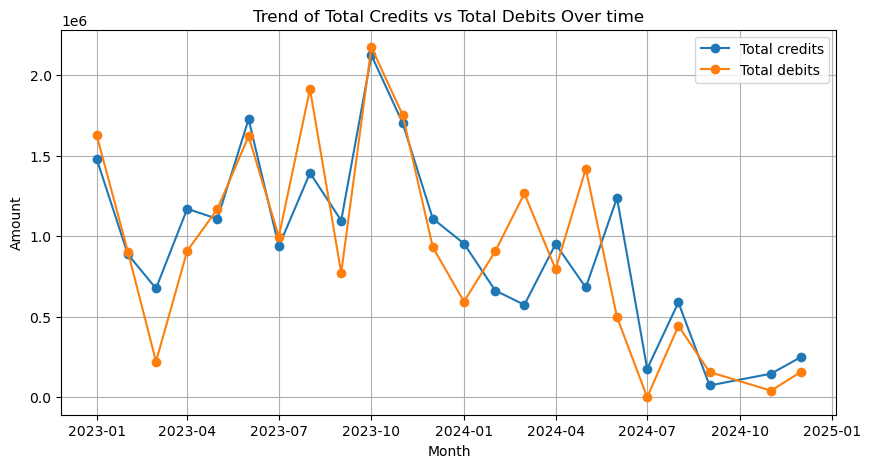

In [71]:
## Plot trends in total credits vs. debits over time.

plt.figure(figsize=(10,5))
plt.plot(Monthly_summary.index.to_timestamp(),Monthly_summary['TotalCredits'],marker='o',label='Total credits')
plt.plot(Monthly_summary.index.to_timestamp(),Monthly_summary['TotalDebits'],marker='o',label='Total debits')
plt.title('Trend of Total Credits vs Total Debits Over time')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
## Identify top and bottom performing accounts based on net inflow.

account_inflow = barclays.groupby('AccountID').agg(TotalCredits=('CreditAmount', 'sum'),
                                                    TotalDebits=('DebitAmount', 'sum'))

account_inflow['NetInflow'] = account_inflow['TotalCredits'] - account_inflow['TotalDebits']

In [73]:
top_accounts = account_inflow.sort_values(by='NetInflow', ascending=False).head(5)
print("Top Performing Accounts Based on Net Inflow:")
print(top_accounts)

Top Performing Accounts Based on Net Inflow:
           TotalCredits  TotalDebits  NetInflow
AccountID                                      
ACC92360     388,366.21    14,658.78 373,707.43
ACC21878     331,934.09         0.00 331,934.09
ACC83581     419,196.56    88,435.12 330,761.44
ACC13357     280,648.89         0.00 280,648.89
ACC30787     263,562.98         0.00 263,562.98


In [74]:
bottom_accounts = account_inflow.sort_values(by='NetInflow', ascending=True).head(5)
print("Bottom Performing Accounts Based on Net Inflow:")
print(bottom_accounts)

Bottom Performing Accounts Based on Net Inflow:
           TotalCredits  TotalDebits   NetInflow
AccountID                                       
ACC49140           0.00   377,859.70 -377,859.70
ACC25132      52,497.26   396,264.07 -343,766.80
ACC45968           0.00   339,222.52 -339,222.52
ACC77592           0.00   320,017.92 -320,017.92
ACC29396      13,840.62   325,716.38 -311,875.76


In [75]:
## Identify and flag accounts as dormant or inactive if there is a gap of two months or more between consecutive transactions.

# Sort by AccountID and TransactionDate
barclays = barclays.sort_values(by=['AccountID', 'TransactionDate'])

# Calculate gaps between consecutive transactions (in days)
barclays['GapDays'] = barclays.groupby('AccountID')['TransactionDate'].diff().dt.days
barclays



,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths,Year,Month,CreditAmount,DebitAmount,GapDays
739,10,CUST2805,ACC10117,Savings,Transfer,Credit Card,Firm A,North,Manager 3,2023-01-06,"40,222.60","94,099.95",0.74,711,41,2023,2023-01,"40,222.60",0.00,NaN
681,76,CUST6735,ACC10117,Loan,Payment,Credit Card,Firm D,North,Manager 1,2023-08-11,"83,158.65","110,937.57",0.61,687,236,2023,2023-08,0.00,"83,158.65",217.00
41,112,CUST8091,ACC10117,Loan,Deposit,Personal Loan,Firm A,West,Manager 2,2024-06-04,"54,168.90","97,023.17",0.72,400,148,2024,2024-06,"54,168.90",0.00,298.00
265,72,CUST7002,ACC10117,Savings,Deposit,Mutual Fund,Firm B,North,Manager 2,2024-06-22,"60,877.06","89,254.12",0.50,586,93,2024,2024-06,"60,877.06",0.00,18.00
201,103,CUST8772,ACC10996,Current,Deposit,Credit Card,Firm D,South,Manager 2,2023-01-17,"42,376.42","67,044.55",0.66,818,203,2023,2023-01,"42,376.42",0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,183,CUST3315,ACC99409,Current,Deposit,Mutual Fund,Firm E,Central,Manager 1,2023-11-21,"61,871.26","97,033.29",0.61,614,175,2023,2023-11,"61,871.26",0.00,21.00
323,176,CUST1569,ACC99549,Credit,Transfer,Personal Loan,Firm E,East,Manager 1,2023-06-07,"57,187.42","45,475.87",0.54,699,140,2023,2023-06,"57,187.42",0.00,NaN
378,12,CUST5320,ACC99549,Credit,Deposit,Savings Account,Firm D,North,Manager 1,2023-06-20,"35,111.63","63,729.38",0.63,485,159,2023,2023-06,"35,111.63",0.00,13.00
133,122,CUST3609,ACC99549,Loan,Transfer,Credit Card,Firm B,South,Manager 1,2023-09-13,"58,574.85","29,030.71",0.73,481,97,2023,2023-09,"58,574.85",0.00,85.00


In [76]:
# Flag dormant accounts if gap >= 60 days (approx 2 months)
barclays['DormantFlag'] = barclays['GapDays'].apply(lambda x: 'Dormant' if x >= 60 else 'Active')
barclays

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,...,AccountBalance,RiskScore,CreditRating,TenureMonths,Year,Month,CreditAmount,DebitAmount,GapDays,DormantFlag
739,10,CUST2805,ACC10117,Savings,Transfer,Credit Card,Firm A,North,Manager 3,2023-01-06,...,"94,099.95",0.74,711,41,2023,2023-01,"40,222.60",0.00,NaN,Active
681,76,CUST6735,ACC10117,Loan,Payment,Credit Card,Firm D,North,Manager 1,2023-08-11,...,"110,937.57",0.61,687,236,2023,2023-08,0.00,"83,158.65",217.00,Dormant
41,112,CUST8091,ACC10117,Loan,Deposit,Personal Loan,Firm A,West,Manager 2,2024-06-04,...,"97,023.17",0.72,400,148,2024,2024-06,"54,168.90",0.00,298.00,Dormant
265,72,CUST7002,ACC10117,Savings,Deposit,Mutual Fund,Firm B,North,Manager 2,2024-06-22,...,"89,254.12",0.50,586,93,2024,2024-06,"60,877.06",0.00,18.00,Active
201,103,CUST8772,ACC10996,Current,Deposit,Credit Card,Firm D,South,Manager 2,2023-01-17,...,"67,044.55",0.66,818,203,2023,2023-01,"42,376.42",0.00,NaN,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,183,CUST3315,ACC99409,Current,Deposit,Mutual Fund,Firm E,Central,Manager 1,2023-11-21,...,"97,033.29",0.61,614,175,2023,2023-11,"61,871.26",0.00,21.00,Active
323,176,CUST1569,ACC99549,Credit,Transfer,Personal Loan,Firm E,East,Manager 1,2023-06-07,...,"45,475.87",0.54,699,140,2023,2023-06,"57,187.42",0.00,NaN,Active
378,12,CUST5320,ACC99549,Credit,Deposit,Savings Account,Firm D,North,Manager 1,2023-06-20,...,"63,729.38",0.63,485,159,2023,2023-06,"35,111.63",0.00,13.00,Active
133,122,CUST3609,ACC99549,Loan,Transfer,Credit Card,Firm B,South,Manager 1,2023-09-13,...,"29,030.71",0.73,481,97,2023,2023-09,"58,574.85",0.00,85.00,Dormant


## TASK 3 : Customer Profile Building

In [137]:
## Group accounts by activity levels: High, Medium, Low based on transaction frequency on your analysis and rubrics.

# Count total number of transactions per AccountID
account_activity = barclays.groupby('AccountID').size().reset_index(name='TransactionCount')
account_activity 

highest_count = account_activity['TransactionCount'].max()
print("Highest Transaction Count:", highest_count)

Highest Transaction Count: 11


In [139]:
''' Criteria :
1. Morethan 10 transactions  = High Activity
2. Between 5 and 10 transactions = Medium Activity
3. Lessthan 5 transactions = Low Activity '''

' Criteria :\n1. Morethan 10 transactions  = High Activity\n2. Between 5 and 10 transactions = Medium Activity\n3. Lessthan 5 transactions = Low Activity '

In [140]:
def categorize_activity(count):
    if count > 10:
        return "High"
    elif count >= 5:
        return "Medium"
    else:
        return "Low"

account_activity['ActivityLevel'] = account_activity['TransactionCount'].apply(categorize_activity)
print(account_activity)

    AccountID  TransactionCount ActivityLevel
0    ACC10117                 4           Low
1    ACC10996                 5        Medium
2    ACC11062                 2           Low
3    ACC11188                 4           Low
4    ACC11285                 3           Low
..        ...               ...           ...
188  ACC97225                 5        Medium
189  ACC97411                 2           Low
190  ACC99117                 5        Medium
191  ACC99409                 7        Medium
192  ACC99549                 4           Low

[193 rows x 3 columns]


In [80]:
## Segment customers by average balance and transaction volume.

# Calculate Average Balance and Transaction Count per Account
customer_segmentation = barclays.groupby('AccountID').agg(
                        AvgBalance=('AccountBalance', 'mean'),
                        TransactionVolume=('TransactionID', 'count')).reset_index()
customer_segmentation
highest_Avgbalance = customer_segmentation['AvgBalance'].max()
print("Highest Transaction Count:", highest_Avgbalance)

Highest Transaction Count: 121398.2913


In [81]:
''' Criteria for segmentation:
1. Morethan 10 transactions and Avg balance >80000  :  Premium
2. Between 5 and 10 transactions and Avg balance >= 30000 = Standard
3. Lessthan 5 transactions and Avg balance <30000 = Basic '''


def segment_customer(row):
    if row['AvgBalance'] > 80000 and row['TransactionVolume'] > 8:
        return 'Premium'
    elif row['AvgBalance'] >= 30000 and row['TransactionVolume'] >= 4:
        return 'Standard'
    else:
        return 'Basic'

customer_segmentation['Segment'] = customer_segmentation.apply(segment_customer, axis=1)
print(customer_segmentation)

    AccountID  AvgBalance  TransactionVolume   Segment
0    ACC10117   97,828.70                  4  Standard
1    ACC10996   56,982.15                  5  Standard
2    ACC11062   65,947.32                  2     Basic
3    ACC11188   81,169.11                  4  Standard
4    ACC11285   62,574.61                  3     Basic
..        ...         ...                ...       ...
188  ACC97225   83,082.32                  5  Standard
189  ACC97411   92,986.56                  2     Basic
190  ACC99117   63,718.26                  5  Standard
191  ACC99409   80,812.93                  7  Standard
192  ACC99549   61,264.77                  4  Standard

[193 rows x 4 columns]


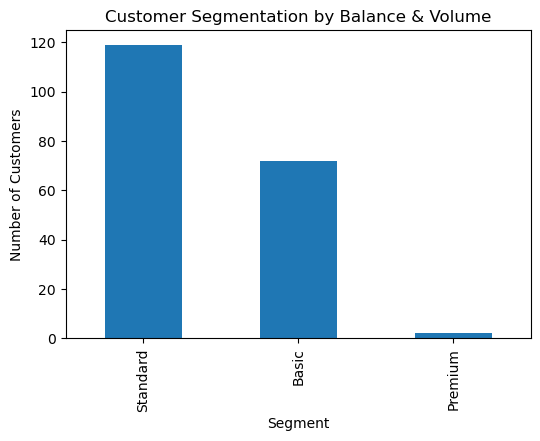

In [82]:
customer_segmentation['Segment'].value_counts().plot(kind='bar', figsize=(6,4), title='Customer Segmentation by Balance & Volume')
plt.ylabel("Number of Customers")
plt.show() 

In [90]:
## Create profiles for High-net inflow account.

# Create NetInflow per transaction
barclays['CreditAmount'] = barclays['CreditAmount'].fillna(0)
barclays['DebitAmount'] = barclays['DebitAmount'].fillna(0)
barclays['NetInflow'] = barclays['CreditAmount'] - barclays['DebitAmount']
barclays['NetInflow']

739    40,222.60
681   -83,158.65
41     54,168.90
265    60,877.06
201    42,376.42
         ...    
775    61,871.26
323    57,187.42
378    35,111.63
133    58,574.85
591   -32,735.51
Name: NetInflow, Length: 800, dtype: float64

In [91]:
Account_summary = barclays.groupby('AccountID').agg(TotalNetInflow = ('NetInflow', 'sum'),
                                                     TotalCredits = ('CreditAmount','sum'),
                                                     TotalDebits = ('DebitAmount','sum'),
                                                     AverageBalance = ('AccountBalance','mean'),
                                                     TransactionCount = ('TransactionID','count'),
                                                     LastBalance = ('AccountBalance','last')).reset_index()
Account_summary

,AccountID,TotalNetInflow,TotalCredits,TotalDebits,AverageBalance,TransactionCount,LastBalance
0,ACC10117,"72,109.91","155,268.56","83,158.65","97,828.70",4,"89,254.12"
1,ACC10996,"-102,504.07","83,483.64","185,987.71","56,982.15",5,"53,528.81"
2,ACC11062,"-110,594.78",0.00,"110,594.78","65,947.32",2,"81,908.52"
3,ACC11188,"-183,846.37","20,835.55","204,681.91","81,169.11",4,"106,361.59"
4,ACC11285,"-90,338.05","72,890.75","163,228.80","62,574.61",3,"-17,751.22"
...,...,...,...,...,...,...,...
188,ACC97225,"-122,760.64","33,587.48","156,348.12","83,082.32",5,"85,716.08"
189,ACC97411,"204,177.34","204,177.34",0.00,"92,986.56",2,"82,355.32"
190,ACC99117,"-52,868.08","79,347.84","132,215.92","63,718.26",5,"100,673.21"
191,ACC99409,115.93,"181,648.36","181,532.43","80,812.93",7,"97,033.29"


In [92]:
## High-Net Inflow Accounts  (top 20%)

threshold_inflow = Account_summary['TotalNetInflow'].quantile(0.80)

HighNetInflow_profiles = Account_summary[Account_summary['TotalNetInflow'] >= threshold_inflow].sort_values(by='TotalNetInflow', ascending=False)
HighNetInflow_profiles

,AccountID,TotalNetInflow,TotalCredits,TotalDebits,AverageBalance,TransactionCount,LastBalance
179,ACC92360,"373,707.43","388,366.21","14,658.78","86,519.53",7,"94,608.85"
25,ACC21878,"331,934.09","331,934.09",0.00,"73,072.80",7,"155,614.30"
165,ACC83581,"330,761.44","419,196.56","88,435.12","68,823.92",10,"27,359.83"
8,ACC13357,"280,648.89","280,648.89",0.00,"78,367.60",5,"109,567.43"
53,ACC30787,"263,562.98","263,562.98",0.00,"67,822.60",4,"91,528.15"
156,ACC80131,"255,833.40","406,046.93","150,213.53","84,181.03",8,"57,421.51"
52,ACC30146,"255,461.30","282,955.33","27,494.04","49,391.93",6,"17,864.34"
168,ACC87006,"241,989.72","241,989.72",0.00,"86,861.57",3,"91,506.22"
113,ACC57597,"217,248.82","270,467.29","53,218.47","57,991.29",5,"57,361.75"
88,ACC46655,"216,287.92","332,943.47","116,655.55","57,869.99",8,"73,636.40"


In [93]:
## High-Frequency Low-Balance Accounts ( Transaction count > 80% and Average balance < 20% )

freq_threshold = Account_summary['TransactionCount'].quantile(0.75)
low_balance_threshold = Account_summary['AverageBalance'].quantile(0.25)

HighFreqLowBalance_profiles = Account_summary[(Account_summary['TransactionCount'] >= freq_threshold) &
    (Account_summary['AverageBalance'] <= low_balance_threshold)].sort_values(by='TransactionCount', ascending=False)
HighFreqLowBalance_profiles


,AccountID,TotalNetInflow,TotalCredits,TotalDebits,AverageBalance,TransactionCount,LastBalance
97,ACC49422,"-93,556.79","235,693.37","329,250.16","62,362.27",11,"91,872.83"
109,ACC54589,"110,838.59","415,471.09","304,632.50","54,155.28",10,"32,233.45"
180,ACC92558,"-125,245.80","259,921.65","385,167.45","50,319.28",9,"18,858.95"
88,ACC46655,"216,287.92","332,943.47","116,655.55","57,869.99",8,"73,636.40"
151,ACC77773,"194,593.61","335,391.13","140,797.52","48,124.05",7,"99,018.53"
128,ACC66086,"107,060.25","220,513.86","113,453.61","46,633.16",6,"7,645.64"
52,ACC30146,"255,461.30","282,955.33","27,494.04","49,391.93",6,"17,864.34"
93,ACC49140,"-377,859.70",0.00,"377,859.70","50,181.18",6,"15,668.12"
7,ACC12334,"-149,731.90","89,497.15","239,229.06","58,469.94",5,"35,311.92"
1,ACC10996,"-102,504.07","83,483.64","185,987.71","56,982.15",5,"53,528.81"


In [94]:
## Accounts with negative or near-zero balances

NegNearZeroBalance_profiles = Account_summary[(Account_summary['LastBalance'] <= 0) |
                              (Account_summary['AverageBalance'] <= 100) ].sort_values(by='LastBalance')
NegNearZeroBalance_profiles 

,AccountID,TotalNetInflow,TotalCredits,TotalDebits,AverageBalance,TransactionCount,LastBalance
4,ACC11285,"-90,338.05","72,890.75","163,228.80","62,574.61",3,"-17,751.22"
149,ACC77592,"-320,017.92",0.00,"320,017.92","89,433.62",4,"-14,999.18"
138,ACC71938,"35,052.37","162,824.74","127,772.36","39,744.70",4,"-12,493.96"
33,ACC24880,"-38,738.14","94,228.54","132,966.68","32,516.73",4,"-5,199.93"


In [ ]:
## Task 4: Financial Risk Identification

In [97]:
## Track accounts with frequent large withdrawals or overdrafts.(top 25%)

large_withdrawal_threshold = barclays['DebitAmount'].quantile(0.75)
barclays['LargeWithdrawal'] = barclays['DebitAmount'] >= large_withdrawal_threshold
barclays.groupby('AccountID')['LargeWithdrawal'].sum()

AccountID
ACC10117    1
ACC10996    2
ACC11062    1
ACC11188    2
ACC11285    2
           ..
ACC97225    1
ACC97411    0
ACC99117    1
ACC99409    1
ACC99549    0
Name: LargeWithdrawal, Length: 193, dtype: int64

In [98]:
barclays['Overdraft'] = barclays['AccountBalance'] < 0
[barclays['Overdraft']]

[739    False
 681    False
 41     False
 265    False
 201    False
        ...  
 775    False
 323    False
 378    False
 133    False
 591    False
 Name: Overdraft, Length: 800, dtype: bool]

In [99]:
risk_summary = barclays.groupby('AccountID').agg(LargeWithdrawalCount = ('LargeWithdrawal','sum'),
                                                 OverdraftCount = ('Overdraft','sum'),
                                                 TotalWithdrawals = ('DebitAmount','sum'),
                                                 AverageBalance = ('AccountBalance','mean'),
                                                 TransactionCount = ('TransactionID','count')).reset_index()
risk_summary

,AccountID,LargeWithdrawalCount,OverdraftCount,TotalWithdrawals,AverageBalance,TransactionCount
0,ACC10117,1,0,"83,158.65","97,828.70",4
1,ACC10996,2,0,"185,987.71","56,982.15",5
2,ACC11062,1,0,"110,594.78","65,947.32",2
3,ACC11188,2,0,"204,681.91","81,169.11",4
4,ACC11285,2,1,"163,228.80","62,574.61",3
...,...,...,...,...,...,...
188,ACC97225,1,0,"156,348.12","83,082.32",5
189,ACC97411,0,0,0.00,"92,986.56",2
190,ACC99117,1,0,"132,215.92","63,718.26",5
191,ACC99409,1,0,"181,532.43","80,812.93",7


In [100]:
Risky_accounts = risk_summary[(risk_summary['LargeWithdrawalCount'] > 2) |
                              (risk_summary['OverdraftCount'] > 1)].sort_values(by='LargeWithdrawalCount', ascending=False)
Risky_accounts


,AccountID,LargeWithdrawalCount,OverdraftCount,TotalWithdrawals,AverageBalance,TransactionCount
35,ACC25132,4,0,"396,264.07","68,227.53",8
49,ACC29396,4,0,"325,716.38","64,504.12",6
109,ACC54589,4,0,"304,632.50","54,155.28",10
9,ACC15228,3,0,"230,051.40","78,477.88",6
20,ACC19178,3,0,"370,437.88","74,153.84",11
19,ACC19156,3,1,"196,374.26","64,046.13",4
63,ACC34568,3,0,"270,412.90","80,584.91",5
59,ACC32890,3,1,"187,481.21","68,689.96",8
79,ACC42710,3,0,"371,635.31","73,091.72",10
80,ACC42903,3,0,"191,352.05","56,521.40",3


In [6]:
## Calculate balance volatility using standard deviation or coefficient of variation

balance_volatility = barclays.groupby('AccountID')['AccountBalance'].std().reset_index()
balance_volatility.rename(columns={'AccountBalance': 'Balance_STD'}, inplace=True)
balance_volatility

,AccountID,Balance_STD
0,ACC10117,9308.031969
1,ACC10996,18946.737199
2,ACC11062,22572.552392
3,ACC11188,20160.417506
4,ACC11285,70126.826097
...,...,...
188,ACC97225,15387.749242
189,ACC97411,15034.842456
190,ACC99117,37380.402970
191,ACC99409,37819.029101


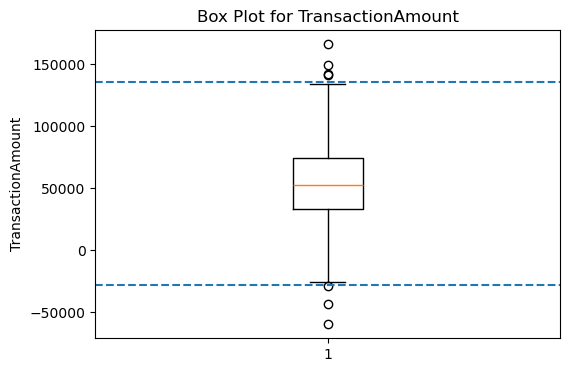

In [101]:
## Use IQR or z-score methods to detect anomalies.

anomalies, lower, upper = detect_iqr(barclays, 'TransactionAmount')

# Plot the box plot
plot_box(barclays, 'TransactionAmount', lower, upper)


In [122]:
## Highlight customers with irregular or suspicious transaction behavior.

## Flag Large Withdrawals
withdrawal_threshold =barclays['TransactionAmount'].quantile(0.95)
barclays['LargeWithdrawal'] = ((barclays['TransactionType'] == 'Debit') & 
                         (barclays['TransactionAmount'] > withdrawal_threshold)).astype(int)
barclays['LargeWithdrawal']

739    0
681    0
41     0
265    0
201    0
      ..
775    0
323    0
378    0
133    0
591    0
Name: LargeWithdrawal, Length: 800, dtype: int64

In [121]:
## 40% balance drop
barclays = barclays.sort_values(['AccountID', 'TransactionDate'])
barclays['PrevBalance'] = barclays.groupby('AccountID')['AccountBalance'].shift(1)

barclays['BalanceDrop'] = ((barclays['PrevBalance'] - barclays['AccountBalance']) / barclays['PrevBalance'])
barclays['SharpBalanceDrop'] = (barclays['BalanceDrop'] > 0.40).astype(int)


In [114]:
## High-frequency (5%) accounts
txn_counts =barclays.groupby('AccountID').size()
cutoff = txn_counts.quantile(0.95)

barclays['HighFrequencyAccount'] = barclays['AccountID'].map(lambda x: 1 if txn_counts[x] > cutoff else 0)


In [118]:
## SuspicionScore

barclays['SuspicionScore'] = ( barclays['LargeWithdrawal'] + barclays['SharpBalanceDrop'] + barclays['HighFrequencyAccount'])

## Suspicion Score Per Customer

suspicious_customers = (barclays.groupby('AccountID')['SuspicionScore'].sum().reset_index().sort_values('SuspicionScore', ascending=False))
suspicious_customers.head(10)

,AccountID,SuspicionScore
109,ACC54589,14
97,ACC49422,14
165,ACC83581,14
79,ACC42710,12
180,ACC92558,12
181,ACC94203,12
20,ACC19178,12
160,ACC82381,11
93,ACC49140,4
19,ACC19156,3


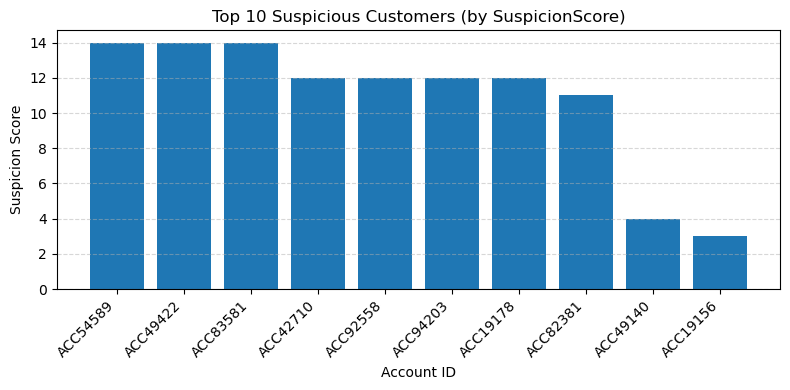

In [124]:

## Plot Top 10 Suspicious Customers

import matplotlib.pyplot as plt

# Select Top 10 Suspicious Customers
top10 = suspicious_customers.head(10)
plt.figure(figsize=(8, 4))
# Create Bar Plot
plt.bar(top10['AccountID'], top10['SuspicionScore'])
plt.title('Top 10 Suspicious Customers (by SuspicionScore)')
plt.xlabel('Account ID')
plt.ylabel('Suspicion Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


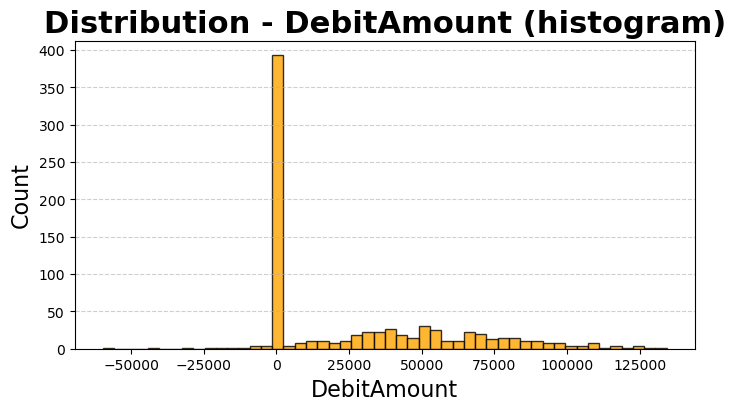

In [127]:
## Histogram of DebitAmount

plt.figure(figsize=(8, 4))
plt.hist(barclays['DebitAmount'],bins=50,color='orange',edgecolor='black',alpha=0.8)
plt.title("Distribution - DebitAmount (histogram)", fontsize=22, fontweight='bold')
plt.xlabel("DebitAmount", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


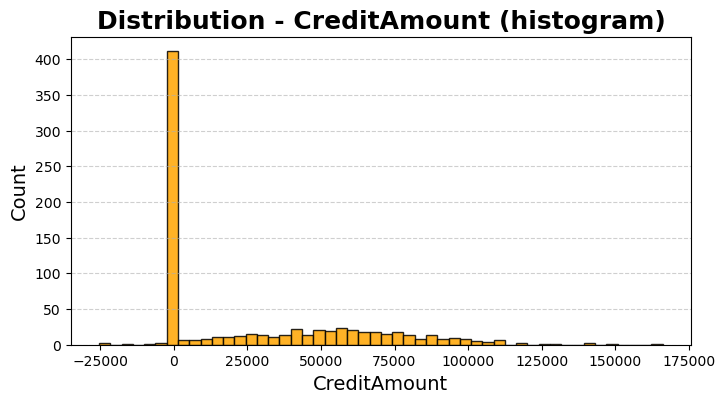

In [130]:
## Histogram of CreditAmount
plt.figure(figsize=(8, 4))
plt.hist(barclays['CreditAmount'],bins=50,color='orange',edgecolor='black',alpha=0.85)
plt.title("Distribution - CreditAmount (histogram)", fontsize=18, fontweight='bold')
plt.xlabel("CreditAmount", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


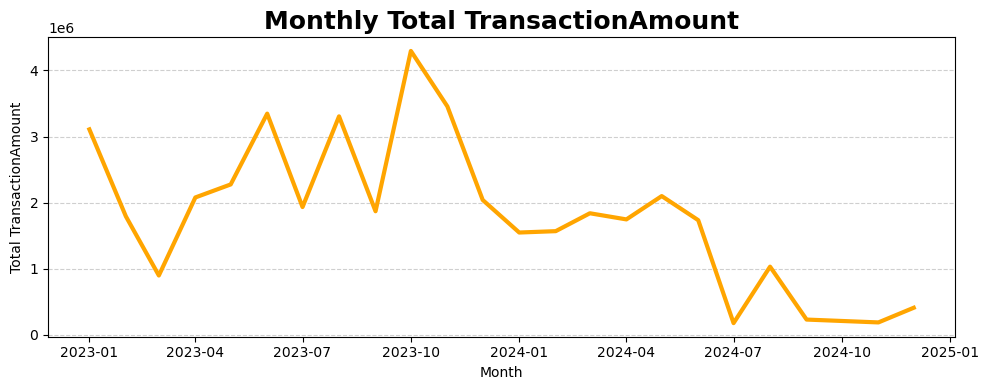

In [136]:
## Monthly Total TransactionAmount Line Plot
monthly_summary = (barclays.groupby(barclays['TransactionDate'].dt.to_period('M'))['TransactionAmount'].sum().reset_index())
monthly_summary['TransactionDate'] = monthly_summary['TransactionDate'].dt.to_timestamp()
# Plot
plt.figure(figsize=(10, 4))
plt.plot(monthly_summary['TransactionDate'],monthly_summary['TransactionAmount'],color="orange",linewidth=3)
plt.title("Monthly Total TransactionAmount", fontsize=18, fontweight='bold')
plt.xlabel("Month", fontsize=10)
plt.ylabel("Total TransactionAmount", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [142]:
##  Count transactions per account ( from task 3 )

account_activity = barclays.groupby('AccountID').size().reset_index(name='TransactionCount')
account_activity 

,AccountID,TransactionCount
0,ACC10117,4
1,ACC10996,5
2,ACC11062,2
3,ACC11188,4
4,ACC11285,3
...,...,...
188,ACC97225,5
189,ACC97411,2
190,ACC99117,5
191,ACC99409,7


In [145]:
## calculate Average balance

avg_balance = barclays.groupby('AccountID')['AccountBalance'].mean().reset_index(name='AvgBalance')
avg_balance

,AccountID,AvgBalance
0,ACC10117,"97,828.70"
1,ACC10996,"56,982.15"
2,ACC11062,"65,947.32"
3,ACC11188,"81,169.11"
4,ACC11285,"62,574.61"
...,...,...
188,ACC97225,"83,082.32"
189,ACC97411,"92,986.56"
190,ACC99117,"63,718.26"
191,ACC99409,"80,812.93"


In [148]:
account_summary = pd.concat([account_activity , avg_balance], axis=1)
account_summary

,AccountID,TransactionCount,AccountID,AvgBalance
0,ACC10117,4,ACC10117,"97,828.70"
1,ACC10996,5,ACC10996,"56,982.15"
2,ACC11062,2,ACC11062,"65,947.32"
3,ACC11188,4,ACC11188,"81,169.11"
4,ACC11285,3,ACC11285,"62,574.61"
...,...,...,...,...
188,ACC97225,5,ACC97225,"83,082.32"
189,ACC97411,2,ACC97411,"92,986.56"
190,ACC99117,5,ACC99117,"63,718.26"
191,ACC99409,7,ACC99409,"80,812.93"


In [150]:
## Define high-volume & low-volume groups using quartiles
q75 = account_summary['TransactionCount'].quantile(0.75)
q25 = account_summary['TransactionCount'].quantile(0.25)

high_volume = account_summary[account_summary['TransactionCount'] >= q75]['AvgBalance']
low_volume  = account_summary[account_summary['TransactionCount'] <= q25]['AvgBalance']

In [159]:
## Hypothesis Testing

from scipy.stats import ttest_ind

In [158]:
t_stat, p_value = ttest_ind(high_volume, low_volume, equal_var=False)

print("T-test p-value:", p_value)

if p_value < 0.05:
    print("Result: Significant difference in transaction amounts between High and Low Balance customers.")
else:
    print("Result: No significant difference in transaction amounts between High and Low Balance customers.")


T-test p-value: 0.26129684157235
Result: No significant difference in transaction amounts between High and Low Balance customers.


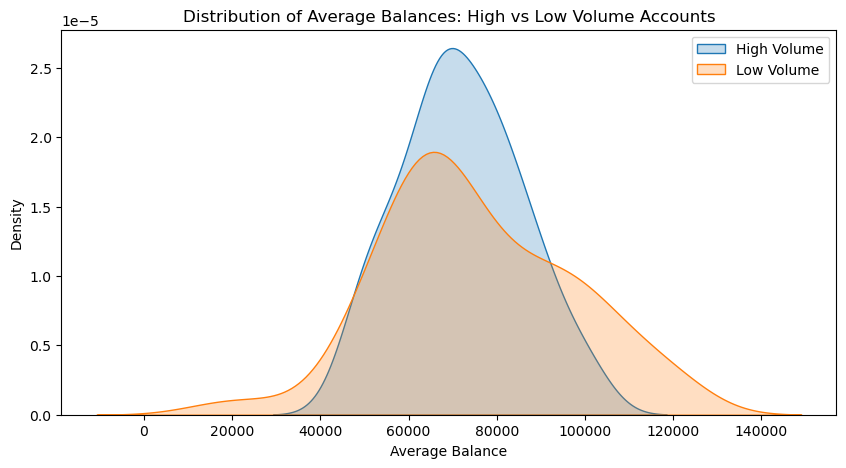

In [160]:
plt.figure(figsize=(10,5))
sns.kdeplot(high_volume, fill=True, label="High Volume")
sns.kdeplot(low_volume, fill=True, label="Low Volume")

plt.title("Distribution of Average Balances: High vs Low Volume Accounts")
plt.xlabel("Average Balance")
plt.ylabel("Density")
plt.legend()
plt.show()